In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pc1_data_path = r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\main_data_with_PC1.csv"
age_gaps_data_path = r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\organ_age_gaps_final.csv"

In [12]:
pc1_data_df = pd.read_csv(pc1_data_path, dtype=str, low_memory=False)
age_gaps_df = pd.read_csv(age_gaps_data_path, dtype=str, low_memory=False)

In [13]:
pc1_data_df["eid"] = pc1_data_df["eid"].astype(str)
age_gaps_df["eid"] = age_gaps_df["eid"].astype(str)

In [14]:
for df in [pc1_data_df, age_gaps_df]:
    for col in df.columns:
        if col != "eid":  # Skip 'eid' column
            df[col] = pd.to_numeric(df[col], errors="coerce")

In [15]:
merged_df = pd.merge(pc1_data_df, age_gaps_df, on="eid")

In [34]:
protein_columns = [col for col in pc1_data_df.columns if col >= "A1BG" and col <= "ZPR1"]
protein_df = pc1_data_df[protein_columns]

In [35]:
protein_corr_matrix = protein_df.corr(method="pearson")

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(protein_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Proteins correlation")
plt.show()

## **Correlation between Organ age gaps**

In [16]:
organ_age_gaps_cols = [col for col in age_gaps_df.columns if col != "eid"]

In [ ]:
pearson_corr_age_gaps = merged_df[organ_age_gaps_cols].corr(method="pearson")
spearman_corr_age_gaps = merged_df[organ_age_gaps_cols].corr(method="spearman")

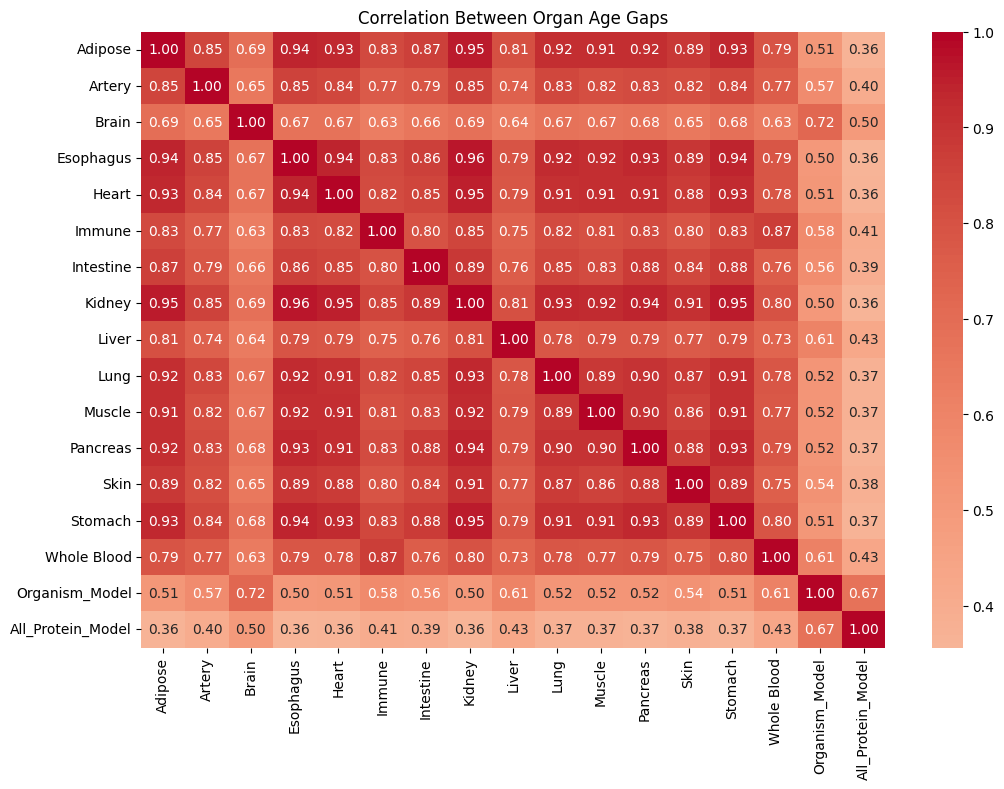

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr_age_gaps, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Correlation Between Organ Age Gaps")
plt.show()

## **Correlation of PC1 with organ age gaps**

In [21]:
pc1_cols = [col for col in pc1_data_df.columns if "_PC1" in col]
pearson_corr_pc1 = merged_df[pc1_cols + organ_age_gaps_cols].corr(method="pearson").loc[pc1_cols, organ_age_gaps_cols]
spearman_corr_pc1 = merged_df[pc1_cols + organ_age_gaps_cols].corr(method="spearman").loc[pc1_cols, organ_age_gaps_cols]

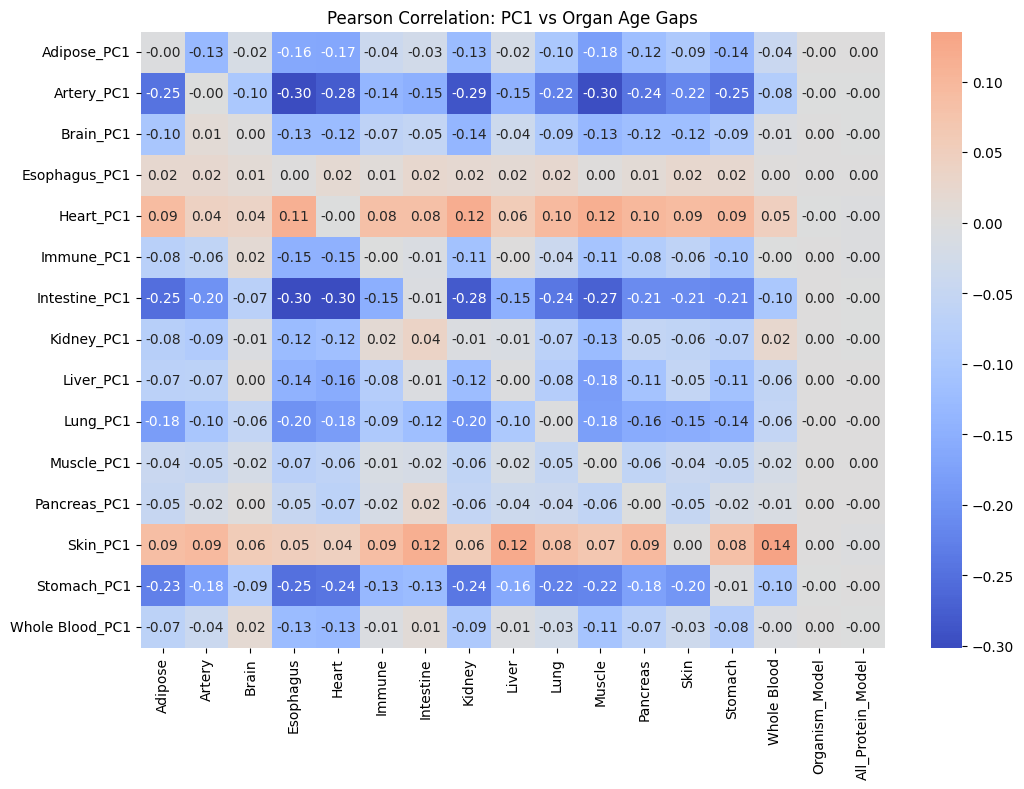

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr_pc1, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Pearson Correlation: PC1 vs Organ Age Gaps")
plt.show()

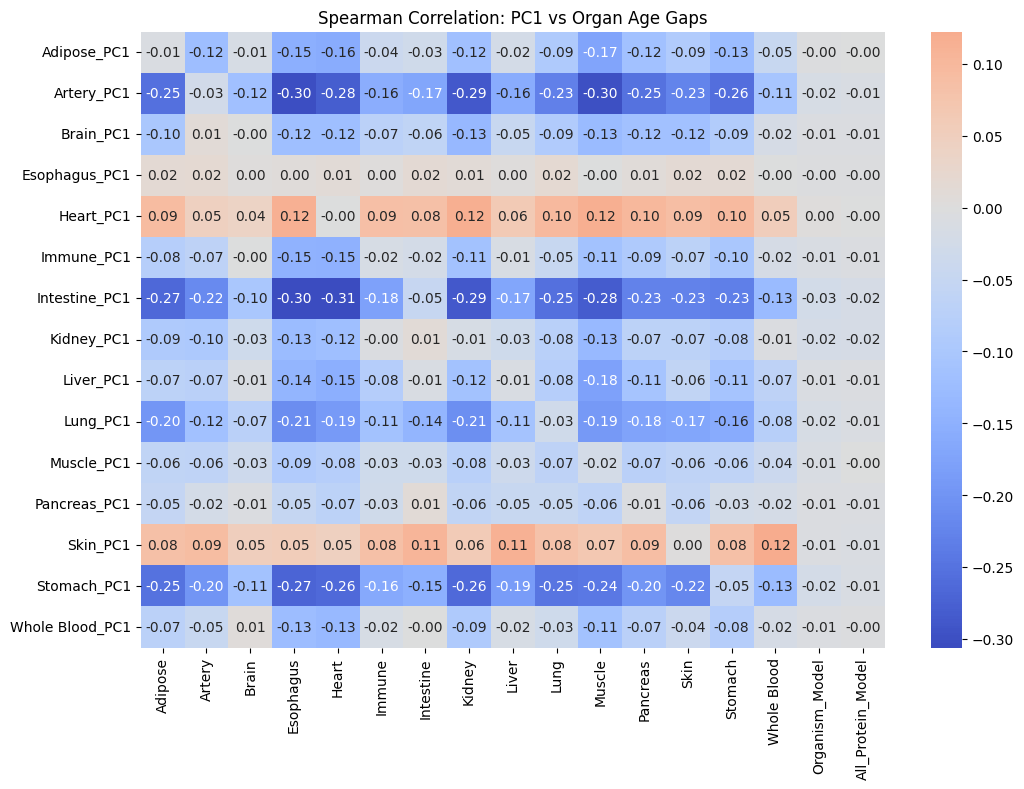

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr_pc1, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Correlation: PC1 vs Organ Age Gaps")
plt.show()